In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

# Read the CSV and Perform Basic Data Cleaning

In [64]:
data_to_load = "data/google_reviews.csv"
data = pd.read_csv(data_to_load)

In [65]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,vader
0,Coloring book moana,ART_AND_DESIGN,3.9,967,967000000,500000,Free,0,Everyone,Art & Design;Pretend Play,0.152652
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,13791000000,1000000,Free,0,Everyone,Art & Design,0.268483
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,194216000000,5000000,Free,0,Everyone,Art & Design,0.412649
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,654000000,100000,Free,0,Everyone,Art & Design,0.283509
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,20260000000,500000,Free,0,Everyone,Art & Design;Creativity,0.171836


In [66]:
from sklearn import preprocessing
popAppsCopy = data.copy()

label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Category'. 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category']) 
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating']) 
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres'])
popAppsCopy['Type']= label_encoder.fit_transform(popAppsCopy['Type']) 

In [67]:
y = popAppsCopy["Installs"]
popAppsCopy_1 = popAppsCopy.drop(labels = ['App','Installs','Genres'],axis=1)
X = popAppsCopy_1
y = y.replace({1:'1000+',5: '1000+', 10: '1000+',50:'1000+',100:'1000+',500:'1000+',
               1000: '1000+',5000:'10000+',10000: '10000+', 50000:'100000+',100000:'100000+',
               500000:'1000000+', 1000000:'1000000+',5000000:'10000000+',10000000:'10000000+',
               50000000:'100000000+',100000000:'100000000+', 500000000:'1000000000+', 
               1000000000:'1000000000+' })
print(X.shape, y.shape)

(816, 8) (816,)


C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


0.011776775001657263


<Figure size 1152x432 with 0 Axes>

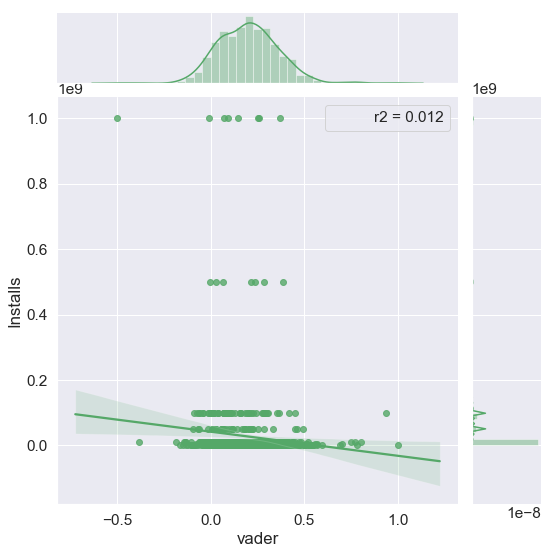

In [68]:
x = popAppsCopy["vader"]
y = popAppsCopy["Installs"]
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

plt.figure(figsize=(16, 6))
sns.jointplot(x, y, kind="reg", color="g",height=8,stat_func=r2)

print(r2(x,y))
plt.grid()
plt.grid()
plt.savefig('Cor_vader.png')

In [69]:
from scipy import stats
stats.spearmanr(data['vader'], data['Installs'])

SpearmanrResult(correlation=-0.2488163837864845, pvalue=5.578082009232365e-13)

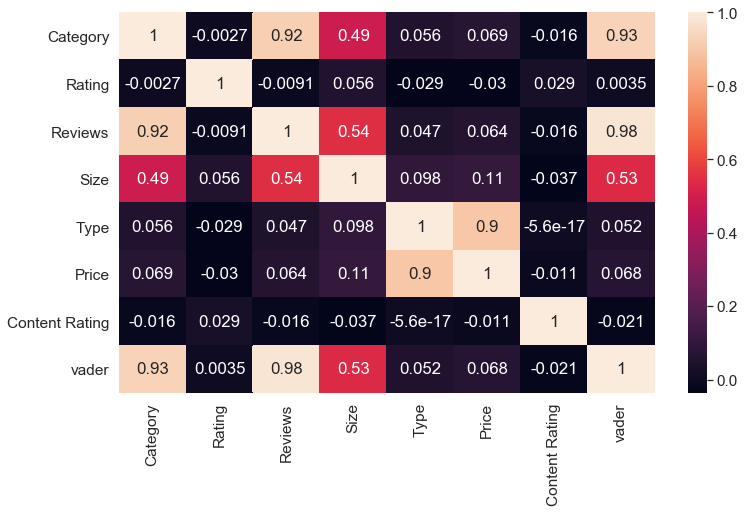

In [70]:
import seaborn as sns
corr = X.apply(lambda x: x.factorize()[0]).corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)
plt.savefig('corr_vader.png')

In [39]:
X.head()

,Category,Rating,Reviews,Size,Type,Price,Content Rating,vader
0,0,3.9,967,967000000,0,0,1,0.152652
1,0,4.4,13791,13791000000,0,0,1,0.268483
2,0,4.3,194216,194216000000,0,0,1,0.412649
3,0,4.1,654,654000000,0,0,1,0.283509
4,0,4.7,20260,20260000000,0,0,1,0.171836


In [40]:
data = popAppsCopy
data = data.drop(labels = ['App','Genres'],axis=1)
data_binary_encoded = pd.get_dummies(data, columns=["Category"])
data_binary_encoded_1 = pd.get_dummies(data_binary_encoded, columns=["Content Rating"])
data_binary_encoded_1.head()

,Rating,Reviews,Size,Installs,Type,Price,vader,Category_0,Category_1,Category_2,...,Category_28,Category_29,Category_30,Category_31,Category_32,Content Rating_0,Content Rating_1,Content Rating_2,Content Rating_3,Content Rating_4
0,3.9,967,967000000,500000,0,0,0.152652,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4.4,13791,13791000000,1000000,0,0,0.268483,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4.3,194216,194216000000,5000000,0,0,0.412649,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.1,654,654000000,100000,0,0,0.283509,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4.7,20260,20260000000,500000,0,0,0.171836,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
X = data_binary_encoded_1.drop("Installs", axis = 1)
feature_names = X.columns
y = data_binary_encoded_1["Installs"]
y = y.replace({1:'1000+',5: '1000+', 10: '1000+',50:'1000+',100:'1000+',500:'1000+',
               1000: '1000+',5000:'10000+',10000: '10000+', 50000:'100000+',100000:'100000+',
               500000:'1000000+', 1000000:'1000000+',5000000:'10000000+',10000000:'10000000+',
               50000000:'100000000+',100000000:'100000000+', 500000000:'1000000000+', 
               1000000000:'1000000000+' })
print(X.shape, y.shape)

(816, 44) (816,)


# Split the data into training and testing

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Fit (train) or model using the training data

In [13]:
classifier.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.12254901960784313
Testing Data Score: 0.10294117647058823


# Standard

In [15]:
classifier.fit(X_train_scaled, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.511437908496732
Testing Data Score: 0.4803921568627451


# Random Forest Model

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6470588235294118

In [18]:
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train_scaled, y_train)
clf1.score(X_test_scaled, y_test)

0.6372549019607843

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
results = rf.predict(X_test)
results_1 = rf.predict(X_train)
rf.score(X_test, y_test)

0.7205882352941176

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.7156862745098039

# Hyperparameter Tuning
Use GridSearchCV to tune the model's parameters

In [44]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
              'max_depth':[1,5,10,15,20]}
grid = GridSearchCV(rf,param_grid,verbose=3)

In [45]:
# Fit the model using the grid search estimator. 
grid.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.546, total=   0.1s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.581, total=   0.2s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.554, total=   0.2s
[CV] max_depth=1, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ....... max_depth=1, n_estimators=200, score=0.556, total=   0.3s
[CV] max_depth=1, n_estimators=200 ...................................
[CV] ....... max_depth=1, n_estimators=200, score=0.571, total=   0.3s
[CV] max_depth=1, n_estimators=200 ...................................
[CV] ....... max_depth=1, n_estimators=200, score=0.559, total=   0.3s
[CV] max_depth=1, n_estimators=300 ...................................
[CV] ....... max_depth=1, n_estimators=300, score=0.556, total=   0.4s
[CV] max_depth=1, n_estimators=300 ...................................
[CV] ....... max_depth=1, n_estimators=300, score=0.562, total=   0.5s
[CV] max_depth=1, n_estimators=300 ...................................
[CV] ....... max_depth=1, n_estimators=300, score=0.559, total=   0.4s
[CV] max_depth=1, n_estimators=400 ...................................
[CV] ....... max_depth=1, n_estimators=400, score=0.565, total=   0.6s
[CV] max_depth=1, n_estimators=400 ...................................
[CV] .

[CV] ...... max_depth=10, n_estimators=100, score=0.733, total=   0.2s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.739, total=   0.4s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.704, total=   0.4s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.728, total=   0.4s
[CV] max_depth=10, n_estimators=300 ..................................
[CV] ...... max_depth=10, n_estimators=300, score=0.725, total=   0.6s
[CV] max_depth=10, n_estimators=300 ..................................
[CV] ...... max_depth=10, n_estimators=300, score=0.690, total=   0.6s
[CV] max_depth=10, n_estimators=300 ..................................
[CV] ...... max_depth=10, n_estimators=300, score=0.723, total=   0.6s
[CV] max_depth=10, n_estimators=400 ..................................
[CV] .

[CV] ...... max_depth=20, n_estimators=100, score=0.754, total=   0.2s
[CV] max_depth=20, n_estimators=100 ..................................
[CV] ...... max_depth=20, n_estimators=100, score=0.700, total=   0.2s
[CV] max_depth=20, n_estimators=100 ..................................
[CV] ...... max_depth=20, n_estimators=100, score=0.738, total=   0.2s
[CV] max_depth=20, n_estimators=200 ..................................
[CV] ...... max_depth=20, n_estimators=200, score=0.739, total=   0.4s
[CV] max_depth=20, n_estimators=200 ..................................
[CV] ...... max_depth=20, n_estimators=200, score=0.690, total=   0.4s
[CV] max_depth=20, n_estimators=200 ..................................
[CV] ...... max_depth=20, n_estimators=200, score=0.708, total=   0.4s
[CV] max_depth=20, n_estimators=300 ..................................
[CV] ...... max_depth=20, n_estimators=300, score=0.749, total=   0.6s
[CV] max_depth=20, n_estimators=300 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.5min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             i

In [46]:
# List the best parameters for this dataset
print(grid.best_params_)

{'max_depth': 15, 'n_estimators': 200}


In [47]:
# List the best score
print(grid.best_score_)

0.7303921568627451


In [48]:
# Create the GridSearchCV model
predictions = grid.predict(X_test)
predictions_train = grid.predict(X_train)

In [49]:
# Train the model with GridSearch
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      10000+       0.33      0.25      0.29         4
     100000+       0.62      0.73      0.67        22
    1000000+       0.81      0.76      0.78        71
   10000000+       0.82      0.81      0.82        81
  100000000+       0.63      0.81      0.71        21
 1000000000+       0.00      0.00      0.00         5

    accuracy                           0.75       204
   macro avg       0.53      0.56      0.54       204
weighted avg       0.75      0.75      0.75       204



In [50]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3661700414223563, 'Reviews'),
 (0.18555143736007465, 'Size'),
 (0.11816726149862827, 'vader'),
 (0.09104924239945383, 'Rating'),
 (0.015390846272706891, 'Category_14'),
 (0.01230160472703881, 'Category_25'),
 (0.0110411440298036, 'Category_20'),
 (0.01095385984001721, 'Content Rating_1'),
 (0.010044600174855685, 'Category_29'),
 (0.009979074826150038, 'Content Rating_4'),
 (0.0097012879468333, 'Category_12'),
 (0.008026714923244497, 'Category_28'),
 (0.0073911080231569325, 'Category_7'),
 (0.007388144480577905, 'Category_13'),
 (0.007263672177458173, 'Category_30'),
 (0.007201723021821332, 'Category_27'),
 (0.007175263114719292, 'Price'),
 (0.006982215790758483, 'Category_6'),
 (0.006873151144070439, 'Content Rating_3'),
 (0.006847145269306651, 'Category_11'),
 (0.006794940815474755, 'Type'),
 (0.005499428158500425, 'Category_31'),
 (0.005270499193168329, 'Category_24'),
 (0.0050260608228320045, 'Category_21'),
 (0.005016892486323993, 'Category_15'),
 (0.004984549691980443, 'Catego

# K Nearest Neighbors Model

k: 1, Train/Test Score: 1.000/0.662
k: 3, Train/Test Score: 0.799/0.686
k: 5, Train/Test Score: 0.765/0.672
k: 7, Train/Test Score: 0.752/0.716
k: 9, Train/Test Score: 0.747/0.716
k: 11, Train/Test Score: 0.729/0.716
k: 13, Train/Test Score: 0.724/0.701
k: 15, Train/Test Score: 0.717/0.711
k: 17, Train/Test Score: 0.722/0.711
k: 19, Train/Test Score: 0.719/0.696


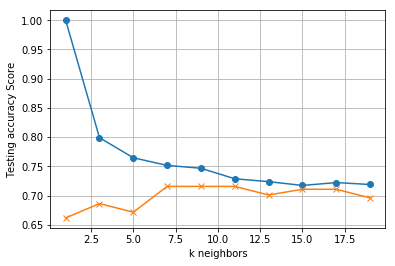

In [28]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.grid()
plt.show()

In [29]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(X_train, y_train)
print('k= 11 Test Acc: %.3f' % knn.score(X_test, y_test))

k= 11 Test Acc: 0.716


# XGBoost Model

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [31]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
# make predictions for test data
y_pred = model.predict(X_test)

In [33]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.57%


In [34]:
model.score(X_test,y_test)

0.7156862745098039

In [35]:
model.score(X_train,y_train)

0.9035947712418301

In [36]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Test score",model.score(X_test_scaled,y_test))
print("Train score",model.score(X_train_scaled,y_train))

Accuracy: 71.57%
Test score 0.7156862745098039
Train score 0.9035947712418301


In [51]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[725 712 635 481 535 809  17 467 570 656 601 334 279 392 382 704 747 278
 406 170 187 734 253  45 597 364  62  78 749 399 312 140 198 350 580 127
 283 796 638 440 144 214 293 310  21 647 646 250 243 435  35  81 159 424
 502 109 272 356  92 741 418 802 211 345 165 238 188 379 578 523 676 155
 316 409 408 366  66 354 372 268 161 294 623 546 717 564 644 363 500 229
 569 299 220 743 628 722  15 245 664   6 454 713 104 303 643 653 302 493
  90 513 460 432 218 602 338 205 583 190 536 436 194 531 132 233 173 178
 313 315 787 753 206 505  96 774 378 504  89 466 179   0  46 171 649 489
 107 545 133 669 223 549 327 362 102 571 108 213 534 367 563 246 789 542
 125 135 586 471 365 779 224  26 661 519 698 468 792   3 134 325 355 434
 186 622 295 681 799 385 490 642 732 225 667 330 369 487 332 422 627 558
 775  63 759 575 360 484 614 112 517 770  20  65 298 126 259 495 662 527
 420 576 339 384 682 137 105   7 342 745 309 791 417 568 692 407 185 814
 353 518 153  54  30 485 724 100 693 671 768 237 70

In [52]:
X_k_ss = np.array(X)
y_k_ss = np.array(y)

X_train_ss, X_test_ss, y_train_ss, y_test_ss = X_k_ss[train_index], X_k_ss[test_index], y_k_ss[train_index], y_k_ss[test_index]

In [53]:
model_2 = XGBClassifier()
model_2.fit(X_train_ss, y_train_ss)

# make predictions for test data
y_pred_2 = model_2.predict(X_test_ss)

In [54]:
# evaluate predictions
accuracy = accuracy_score(y_test_ss, y_pred_2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.59%


In [55]:
model_2.score(X_test_ss,y_test_ss)

0.7058823529411765

In [57]:
model_2.score(X_train_ss,y_train_ss)

0.9150326797385621

Accuracy 0.7058823529411765


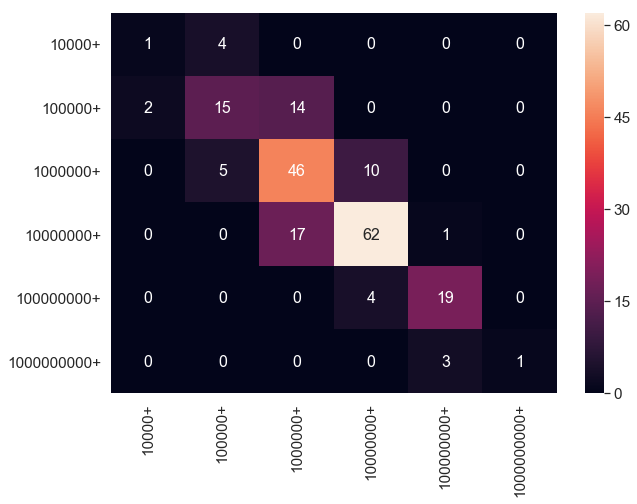

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

labels = np.unique(y_test_ss)
cm = confusion_matrix(y_test_ss, y_pred_2, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print('Accuracy' , accuracy_score(y_test_ss, y_pred_2))
plt.savefig("correlation_xgb_senti.png")